In [11]:
pip install tweedledum

Note: you may need to restart the kernel to use updated packages.


In [12]:
#If you get "The 'tweedledum' library is required to use 'PhaseOracle'. You can install it with 'pip install tweedledum'." restart the kernel.

In [13]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://docs.quantum.ibm.com/run/primitives
# result = Sampler().run(circuits).result()

qiskit_runtime_service.__init__:INFO:2024-04-24 23:40:27,819: Default instance: ibm-q-education/uni-pittsburgh-1/phys-1470


In [14]:
#This initialzes the backend, we choose whether to use a simulator or a real quantum computer
backend = service.get_backend("simulator_statevector")
#Real quantum computer
#backend = service.get_backend("ibmq_lima")
backend

<IBMBackend('simulator_statevector')>

This is the Grover Operator


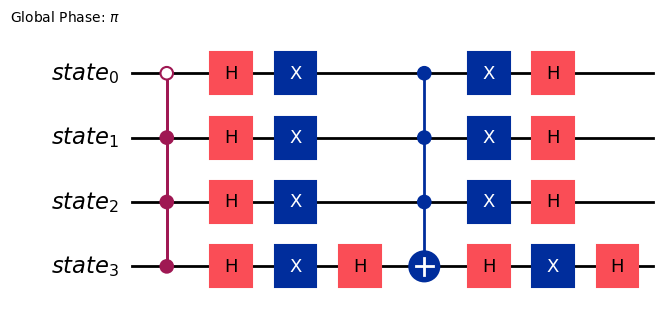

This is the actual circuit where each magenta colored Q gate is the Grover Operator


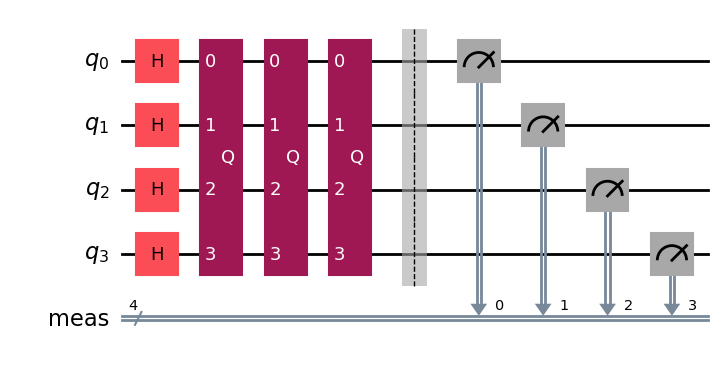

base_primitive._run:INFO:2024-04-24 23:40:37,772: Submitting job using options {'options': {'default_shots': 10000}, 'version': 2, 'support_qiskit': True}
/opt/conda/lib/python3.10/site-packages/qiskit_ibm_runtime/qiskit_runtime_service.py:878: UserWarning: Cloud simulators have been deprecated and will be removed on 15 May 2024. Use the new local testing mode in qiskit-ibm-runtime version 0.22.0 or later to meet your debugging needs.
  warnings.warn(warning_message)


This is the probabiltiy of getting each combination


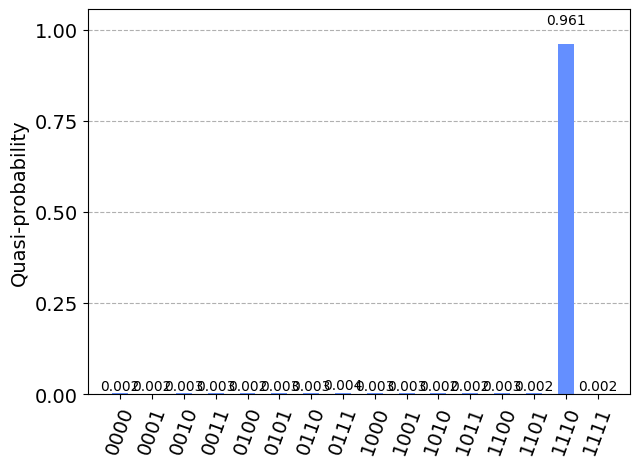

Time taken:  0.7225391864776611
This is how long it took on the Quantum Computer  {'quantum_seconds': None}


In [15]:
import math
import time
from qiskit import QuantumCircuit
from qiskit.primitives import Sampler
from qiskit.circuit.library import GroverOperator, MCMT, ZGate
from qiskit.circuit.library.phase_oracle import PhaseOracle
from qiskit.exceptions import MissingOptionalLibraryError
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# This is the boolean expression we want to solve
expression = "(w ^ x) & ~(y ^ z) & (x & y & z)"
try:
    # This creates the oracle for the specific boolean expression
    oracle = PhaseOracle(expression)
   
    # This creates the grover operator from the oracle
    grover_op = GroverOperator(oracle)
    
    print("This is the Grover Operator")
    
    # This shows the circuit for the oracle
    display(grover_op.decompose().draw(output="mpl", style="iqp"))
    
    #This calculates the optimal number of times to apply the grover operator
    optimal_num_iterations = math.floor(math.pi / (4 * math.asin(math.sqrt(1 / 2**grover_op.num_qubits))))
    
    #This creates the quantum circuit
    qc = QuantumCircuit(grover_op.num_qubits)
    
    # Create even superposition of all basis states
    qc.h(range(grover_op.num_qubits))
    
    # Apply Grover operator the optimal number of times
    qc.compose(grover_op.power(optimal_num_iterations), inplace=True)
    
    # Measure all qubits
    qc.measure_all()
    
    print("This is the actual circuit where each magenta colored Q gate is the Grover Operator")
    
    #This shows the circuit
    display(qc.draw(output="mpl", style="iqp"))

    #This code optimizes the circuit for the computer or simulater
    target = backend.target
    pm = generate_preset_pass_manager(target=target, optimization_level=3)

    circuit_isa = pm.run(qc)
    
    #This creates the sampler based on the backend we chose earlier
    sampler = Sampler(backend=backend)
    
    #This sets the number of shots for the sampler
    sampler.options.default_shots = 10_000
    
    #This helps time the code
    t0 = time.time()
    
    #This runs the sampler
    job = sampler.run([circuit_isa])
    
    #This helps time the code
    t1 = time.time()
    
    #This gets the result of the sample
    result = job.result()
    
    #This gets the distribution from the result of the sampler
    dist = result[0].data.meas.get_counts()
    
    print("This is the probabiltiy of getting each combination")
    
    #This plots the distribution
    display(plot_distribution(dist))
    
    print("Time taken: ", t1-t0)
    print("This is how long it took on the Quantum Computer ", job.usage_estimation)
except MissingOptionalLibraryError as ex:
    print(ex)
    

Above is the whole Grover's Searching algorithm. It starts off by defining what boolean expression we would want to solve. From there we use the boolean expression to create the oracle which is used to create the Grover Operator. We then display the custom Grover Operator for that specific boolean expression.
After that we then run a calculation to see how many times we need to run the Grover Operator on our circuit. Then we create the quantum circuit and run it through a Hadamard transformation so that all qubits are in an equal superposition. Then we place the optimal number of Grover Operators on the circuit.
From there we optimize the circuit for the quantum system we are running it on. This is due to each system having different gates and this makes it so it can run on many different systems. We then create the sampler from the backend we chose earlier and run the circuit 10,000 times. Finally we display the probabilties 
from the sampler. We then used this code a couple more times below only changing the boolean expression.

This is the Grover Operator


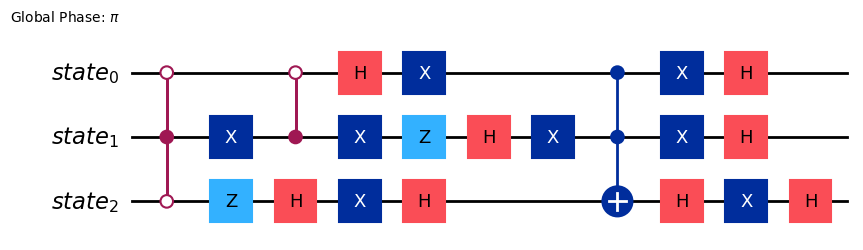

This is the actual circuit where each magenta colored Q gate is the Grover Operator


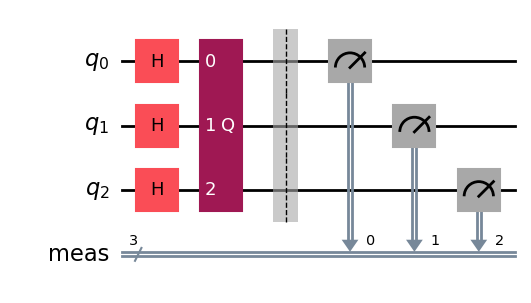

base_primitive._run:INFO:2024-04-24 23:40:42,601: Submitting job using options {'options': {'default_shots': 10000}, 'version': 2, 'support_qiskit': True}
/opt/conda/lib/python3.10/site-packages/qiskit_ibm_runtime/qiskit_runtime_service.py:878: UserWarning: Cloud simulators have been deprecated and will be removed on 15 May 2024. Use the new local testing mode in qiskit-ibm-runtime version 0.22.0 or later to meet your debugging needs.
  warnings.warn(warning_message)


This is the probabiltiy of getting each combination


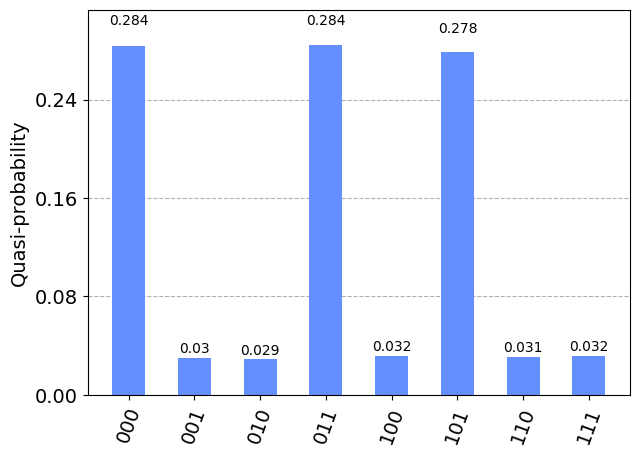

Time taken:  0.6659398078918457
This is how long it took on the Quantum Computer  {'quantum_seconds': None}


In [16]:
# This is the boolean expression has mulitple solutions
expression =  "(~x | ~y | ~z) & (x | ~y | z) & (x | y | ~z) & (x | ~y | ~z) & (~x | y | z)"
try:
    # This creates the oracle for the specific boolean expression
    oracle = PhaseOracle(expression)
   
    #This creates the grover opearator from the oracle
    grover_op = GroverOperator(oracle)
    
    print("This is the Grover Operator")

    
    # This shows the circuit for the oracle
    display(grover_op.decompose().draw(output="mpl", style="iqp"))
    
    #This calculates the optimal number of times to apply the grover operator
    optimal_num_iterations = math.floor(math.pi / (4 * math.asin(math.sqrt(3 / 2**grover_op.num_qubits))))
    
    
    #This creates the quantum circuit
    qc = QuantumCircuit(grover_op.num_qubits)
    
    # Create even superposition of all basis states
    qc.h(range(grover_op.num_qubits))
    
    # Apply Grover operator the optimal number of times
    qc.compose(grover_op.power(optimal_num_iterations), inplace=True)
    
    # Measure all qubits
    qc.measure_all()
    
    print("This is the actual circuit where each magenta colored Q gate is the Grover Operator")
    
    #This shows the circuit
    display(qc.draw(output="mpl", style="iqp"))

    #This code optimizes the circuit for the computer or simulater
    target = backend.target
    pm = generate_preset_pass_manager(target=target, optimization_level=3)

    circuit_isa = pm.run(qc)
    
    #This creates the sampler based on the backend we chose earlier
    sampler = Sampler(backend=backend)
    
    #This sets the number of shots for the sampler
    sampler.options.default_shots = 10_000
    
    #This helps time the code
    t0 = time.time()
    
    #This runs the sampler
    job = sampler.run([circuit_isa])
    
    #This helps time the code
    t1 = time.time()
    
    #This gets the result of the sample
    result = job.result()
    
    #This gets the distribution from the result of the sampler
    dist = result[0].data.meas.get_counts()
    
    print("This is the probabiltiy of getting each combination")
    
    #This plots the distribution
    display(plot_distribution(dist))
    
    print("Time taken: ", t1-t0)
    print("This is how long it took on the Quantum Computer ", job.usage_estimation)
except MissingOptionalLibraryError as ex:
    print(ex)
    

This is the Grover Operator


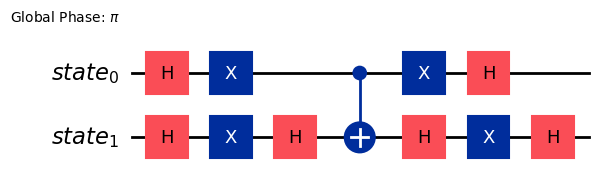

This is the actual circuit where each magenta colored Q gate is the Grover Operator


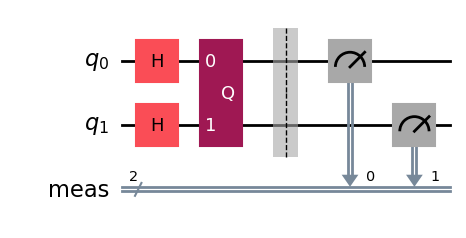

base_primitive._run:INFO:2024-04-24 23:40:46,686: Submitting job using options {'options': {'default_shots': 10000}, 'version': 2, 'support_qiskit': True}
/opt/conda/lib/python3.10/site-packages/qiskit_ibm_runtime/qiskit_runtime_service.py:878: UserWarning: Cloud simulators have been deprecated and will be removed on 15 May 2024. Use the new local testing mode in qiskit-ibm-runtime version 0.22.0 or later to meet your debugging needs.
  warnings.warn(warning_message)


This is the probabiltiy of getting each combination


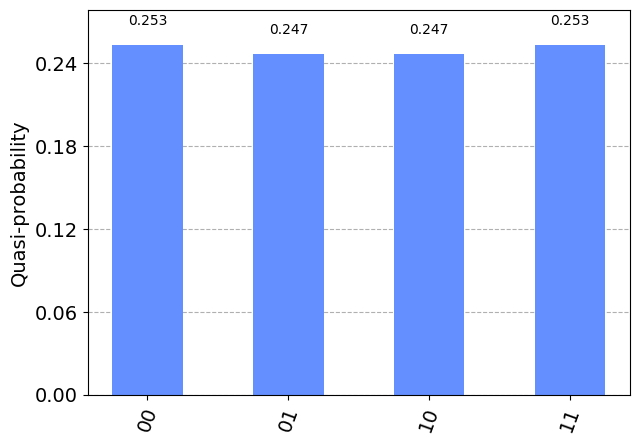

Time taken:  0.7104449272155762
This is how long it took on the Quantum Computer  {'quantum_seconds': None}


In [17]:
# This expression has no solution so it will return an equal probability of all states
expression = "(x & y) & (~x & y)"
try:
    # This creates the oracle for the specific boolean expression
    oracle = PhaseOracle(expression)
   
    #This creates the grover operator from the oracle
    grover_op = GroverOperator(oracle)
    
    print("This is the Grover Operator")
    
    # This shows the circuit for the oracle
    display(grover_op.decompose().draw(output="mpl", style="iqp"))
    
    #This calculates the optimal number of times to apply the grover operator
    optimal_num_iterations = math.floor(math.pi / (4 * math.asin(math.sqrt(1 / 2**grover_op.num_qubits))))
    
    #This creates the quantum circuit
    qc = QuantumCircuit(grover_op.num_qubits)
    
    # Create even superposition of all basis states
    qc.h(range(grover_op.num_qubits))
    
    # Apply Grover operator the optimal number of times
    qc.compose(grover_op.power(optimal_num_iterations), inplace=True)
    
    # Measure all qubits
    qc.measure_all()
    
    print("This is the actual circuit where each magenta colored Q gate is the Grover Operator")
    
    #This shows the circuit
    display(qc.draw(output="mpl", style="iqp"))

    #This code optimizes the circuit for the computer or simulater
    target = backend.target
    pm = generate_preset_pass_manager(target=target, optimization_level=3)

    circuit_isa = pm.run(qc)
    
    #This creates the sampler based on the backend we chose earlier
    sampler = Sampler(backend=backend)
    
    #This sets the number of shots for the sampler
    sampler.options.default_shots = 10_000
    
    #This helps time the code
    t0 = time.time()
    
    #This runs the sampler
    job = sampler.run([circuit_isa])
    
    #This helps time the code
    t1 = time.time()
    
    #This gets the result of the sample
    result = job.result()
    
    #This gets the distribution from the result of the sampler
    dist = result[0].data.meas.get_counts()
    
    print("This is the probabiltiy of getting each combination")
    
    #This plots the distribution
    display(plot_distribution(dist))
    
    print("Time taken: ", t1-t0)
    print("This is how long it took on the Quantum Computer ", job.usage_estimation)
except MissingOptionalLibraryError as ex:
    print(ex)
    

This is the Grover Operator


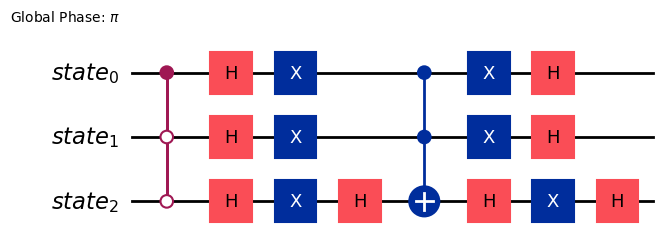

This is the actual circuit where each magenta colored Q gate is the Grover Operator


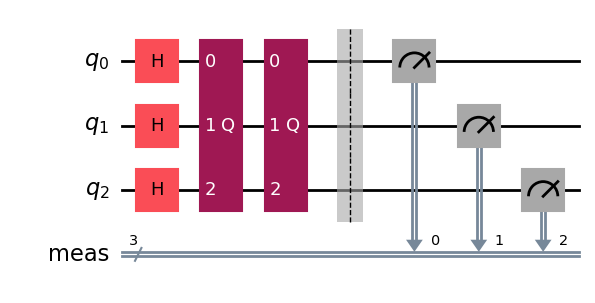

base_primitive._run:INFO:2024-04-24 23:40:50,834: Submitting job using options {'options': {'default_shots': 10000}, 'version': 2, 'support_qiskit': True}
/opt/conda/lib/python3.10/site-packages/qiskit_ibm_runtime/qiskit_runtime_service.py:878: UserWarning: Cloud simulators have been deprecated and will be removed on 15 May 2024. Use the new local testing mode in qiskit-ibm-runtime version 0.22.0 or later to meet your debugging needs.
  warnings.warn(warning_message)


This is the probabiltiy of getting each combination


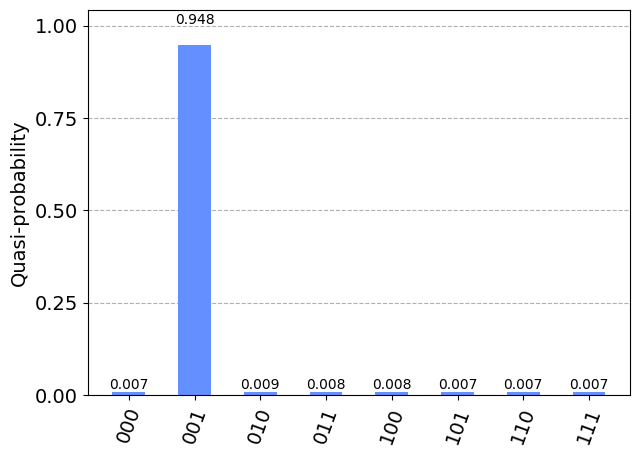

Time taken:  0.98002028465271
This is how long it took on the Quantum Computer  {'quantum_seconds': None}


In [18]:
# This is the boolean expression we want to solve
expression = "(((x==y)==(z))&(x))&((y==(x|z))!=x)"
try:
    # This creates the oracle for the specific boolean expression
    oracle = PhaseOracle(expression)
   
    #This creates the grover operator from the oracle
    grover_op = GroverOperator(oracle)
    
    print("This is the Grover Operator")
    
    # This shows the circuit for the oracle
    display(grover_op.decompose().draw(output="mpl", style="iqp"))
    
    #This calculates the optimal number of times to apply the grover operator
    optimal_num_iterations = math.floor(math.pi / (4 * math.asin(math.sqrt(1 / 2**grover_op.num_qubits))))
    
    #This creates the quantum circuit
    qc = QuantumCircuit(grover_op.num_qubits)
    
    # Create even superposition of all basis states
    qc.h(range(grover_op.num_qubits))
    
    # Apply Grover operator the optimal number of times
    qc.compose(grover_op.power(optimal_num_iterations), inplace=True)
    
    # Measure all qubits
    qc.measure_all()
    
    print("This is the actual circuit where each magenta colored Q gate is the Grover Operator")
    
    #This shows the circuit
    display(qc.draw(output="mpl", style="iqp"))

    #This code optimizes the circuit for the computer or simulater
    target = backend.target
    pm = generate_preset_pass_manager(target=target, optimization_level=3)

    circuit_isa = pm.run(qc)
    
    #This creates the sampler based on the backend we chose earlier
    sampler = Sampler(backend=backend)
    
    #This sets the number of shots for the sampler
    sampler.options.default_shots = 10_000
    
    #This helps time the code
    t0 = time.time()
    
    #This runs the sampler
    job = sampler.run([circuit_isa])
    
    #This helps time the code
    t1 = time.time()
    
    #This gets the result of the sample
    result = job.result()
    
    #This gets the distribution from the result of the sampler
    dist = result[0].data.meas.get_counts()
    
    print("This is the probabiltiy of getting each combination")
    
    #This plots the distribution
    display(plot_distribution(dist))
    
    print("Time taken: ", t1-t0)
    print("This is how long it took on the Quantum Computer ", job.usage_estimation)
except MissingOptionalLibraryError as ex:
    print(ex)
    

This is the Grover Operator


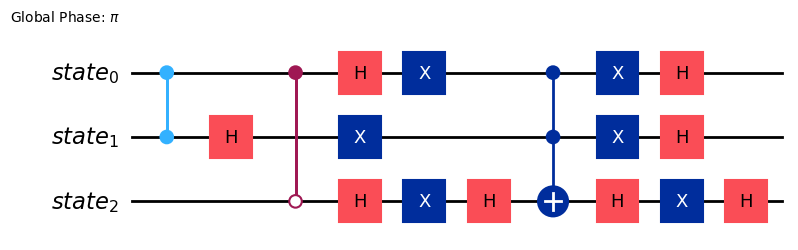

This is the actual circuit where each magenta colored Q gate is the Grover Operator


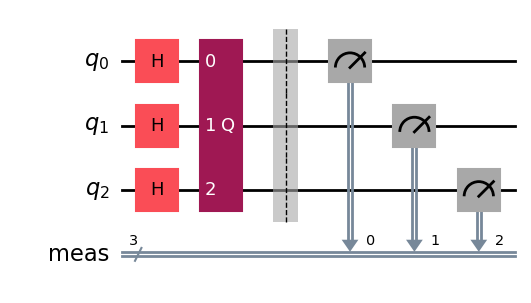

base_primitive._run:INFO:2024-04-24 23:40:56,312: Submitting job using options {'options': {'default_shots': 10000}, 'version': 2, 'support_qiskit': True}
/opt/conda/lib/python3.10/site-packages/qiskit_ibm_runtime/qiskit_runtime_service.py:878: UserWarning: Cloud simulators have been deprecated and will be removed on 15 May 2024. Use the new local testing mode in qiskit-ibm-runtime version 0.22.0 or later to meet your debugging needs.
  warnings.warn(warning_message)


This is the probabiltiy of getting each combination


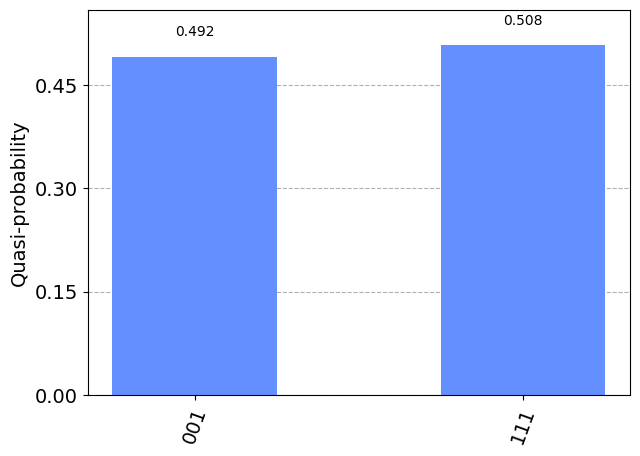

Time taken:  1.005751132965088
This is how long it took on the Quantum Computer  {'quantum_seconds': None}


In [19]:
# This is the boolean expression we want to solve
expression = "((x==y)==(z))&(x)"
try:
    # This creates the oracle for the specific boolean expression
    oracle = PhaseOracle(expression)
   
    #This creates the grover operator from the oracle
    grover_op = GroverOperator(oracle)
    
    print("This is the Grover Operator")
    
    # This shows the circuit for the oracle
    display(grover_op.decompose().draw(output="mpl", style="iqp"))
    
    #This calculates the optimal number of times to apply the grover operator
    optimal_num_iterations = math.floor(math.pi / (4 * math.asin(math.sqrt(2 / 2**grover_op.num_qubits))))
    
    #This creates the quantum circuit
    qc = QuantumCircuit(grover_op.num_qubits)
    
    # Create even superposition of all basis states
    qc.h(range(grover_op.num_qubits))
    
    # Apply Grover operator the optimal number of times
    qc.compose(grover_op.power(optimal_num_iterations), inplace=True)
    
    # Measure all qubits
    qc.measure_all()
    
    print("This is the actual circuit where each magenta colored Q gate is the Grover Operator")
    
    #This shows the circuit
    display(qc.draw(output="mpl", style="iqp"))

    #This code optimizes the circuit for the computer or simulater
    target = backend.target
    pm = generate_preset_pass_manager(target=target, optimization_level=3)

    circuit_isa = pm.run(qc)
    
    #This creates the sampler based on the backend we chose earlier
    sampler = Sampler(backend=backend)
    
    #This sets the number of shots for the sampler
    sampler.options.default_shots = 10_000
    
    #This helps time the code
    t0 = time.time()
    
    #This runs the sampler
    job = sampler.run([circuit_isa])
    
    #This helps time the code
    t1 = time.time()
    
    #This gets the result of the sample
    result = job.result()
    
    #This gets the distribution from the result of the sampler
    dist = result[0].data.meas.get_counts()
    
    print("This is the probabiltiy of getting each combination")
    
    #This plots the distribution
    display(plot_distribution(dist))
    
    print("Time taken: ", t1-t0)
    print("This is how long it took on the Quantum Computer ", job.usage_estimation)
except MissingOptionalLibraryError as ex:
    print(ex)